In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder



In [2]:
df_1 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv")
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [3]:
df_2 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [4]:
df_3 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")
df_3.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
175470,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,62 years 07 months,851888.0
175471,2024-03,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,63 years 04 months,830000.0
175472,2024-03,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,63 years 05 months,820000.0
175473,2024-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,63 years 05 months,860000.0
175474,2024-03,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,62 years 10 months,780000.0


In [5]:
# processing

# df_1 db doesnt have "remaining_lease" columns so I choose the df_2 and df_3 only

# concadinating the df_2 and df_3

df_4 = pd.concat([df_2, df_3], axis = 0)
df_4.reset_index(drop=True, inplace=True)
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [6]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212628 entries, 0 to 212627
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                212628 non-null  object 
 1   town                 212628 non-null  object 
 2   flat_type            212628 non-null  object 
 3   block                212628 non-null  object 
 4   street_name          212628 non-null  object 
 5   storey_range         212628 non-null  object 
 6   floor_area_sqm       212628 non-null  float64
 7   flat_model           212628 non-null  object 
 8   lease_commence_date  212628 non-null  int64  
 9   remaining_lease      212628 non-null  object 
 10  resale_price         212628 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.8+ MB


In [7]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
# this dataset have not any null values
# encoding the catogarical columns 

In [9]:
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [10]:
# creating a new column "address"
df_4["address"] = df_4["block"]+ ""+ df_4["street_name"]

In [11]:
df_5 = df_4.drop(columns=["block", "street_name"])

In [12]:
df_5.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557ANG MO KIO AVE 10


In [13]:
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

In [14]:
# spliting the month column to "Year", "month", "day"
df_5["year"] = df_5["month"].dt.year
df_5["month"] = df_5["month"].dt.month

In [15]:
df_5.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541ANG MO KIO AVE 10,2015
2,1,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163ANG MO KIO AVE 4,2015
3,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446ANG MO KIO AVE 10,2015
4,1,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557ANG MO KIO AVE 10,2015


In [16]:
df_5["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [17]:
df_5["town"].nunique()

26

In [18]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [19]:
df_5["flat_type"].nunique()

7

In [20]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [21]:
df_5["flat_model"].nunique()

21

In [22]:
# choosing the "LabelEncoder" for "town", and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"] = LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"] = LabelEncoder().fit_transform(df_5["flat_model"])
df_5["flat_type"] = LabelEncoder().fit_transform(df_5["flat_type"])

In [23]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [24]:
df_5["flat_type"].unique()

array([2, 3, 4, 1, 5, 0, 6])

In [25]:
df_5["flat_model"].unique()

array([ 5, 12,  8, 17, 16, 13,  7,  3, 10, 19, 20,  2, 18,  4,  9, 15, 11,
       14,  6,  0,  1])

In [26]:
df_5.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
212623,3,25,5,10 TO 12,146.0,3,1987,62 years 07 months,851888.0,791YISHUN AVE 2,2024
212624,3,25,5,07 TO 09,146.0,7,1988,63 years 04 months,830000.0,392YISHUN AVE 6,2024
212625,3,25,5,10 TO 12,146.0,7,1988,63 years 05 months,820000.0,326YISHUN RING RD,2024
212626,3,25,5,04 TO 06,146.0,7,1988,63 years 05 months,860000.0,360YISHUN RING RD,2024
212627,3,25,5,07 TO 09,142.0,3,1987,62 years 10 months,780000.0,606YISHUN ST 61,2024


In [27]:
df_5[["storey_start","storey_end"]] = df_5["storey_range"].str.split(" TO ", expand=True)

In [28]:
# dropping the "storey_range" column
df_5.drop(columns=["storey_range"], inplace=True)

In [29]:
df_5.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2,60.0,5,1986,70,255000.0,174ANG MO KIO AVE 4,2015,07,09
1,1,0,2,68.0,12,1981,65,275000.0,541ANG MO KIO AVE 10,2015,01,03
2,1,0,2,69.0,12,1980,64,285000.0,163ANG MO KIO AVE 4,2015,01,03
3,1,0,2,68.0,12,1979,63,290000.0,446ANG MO KIO AVE 10,2015,01,03
4,1,0,2,68.0,12,1980,64,290000.0,557ANG MO KIO AVE 10,2015,07,09


In [30]:
df_5["address"].nunique()

9581

In [31]:
# address have 9581 unique values in 212627, so I encode it for the correlation checking
# I choosing the "LabelEncoder" for the "address" column 

df_5["address"] = LabelEncoder().fit_transform(df_5["address"])

In [32]:
df_5["storey_start"] = df_5["storey_start"].astype(int)
df_5["storey_end"] = df_5["storey_end"].astype(int)

In [55]:
# "remaining_lease" have a "60year 8 month" this type of data
# so we want to split the year and month seperately for the correlation checking
slice_values = []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n = m.split("  ")
    slice_values.append(n)

In [56]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [57]:
df_data["remaining_lease_year"] = df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"] = df_data["remaining_lease_month"].fillna(0).astype(int)

In [58]:
# dropping the "remaining_lease" column
df_5.drop(columns=["remaining_lease"], inplace=True)

In [59]:
df_6 = pd.concat([df_5, df_data], axis=1)

In [60]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [61]:
# set columns
df_7 = df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [62]:
df_8 = df_7.sort_values(by=["year","month"])

In [63]:
df_8.to_csv("ResaleFlatPrices.csv", index = False)

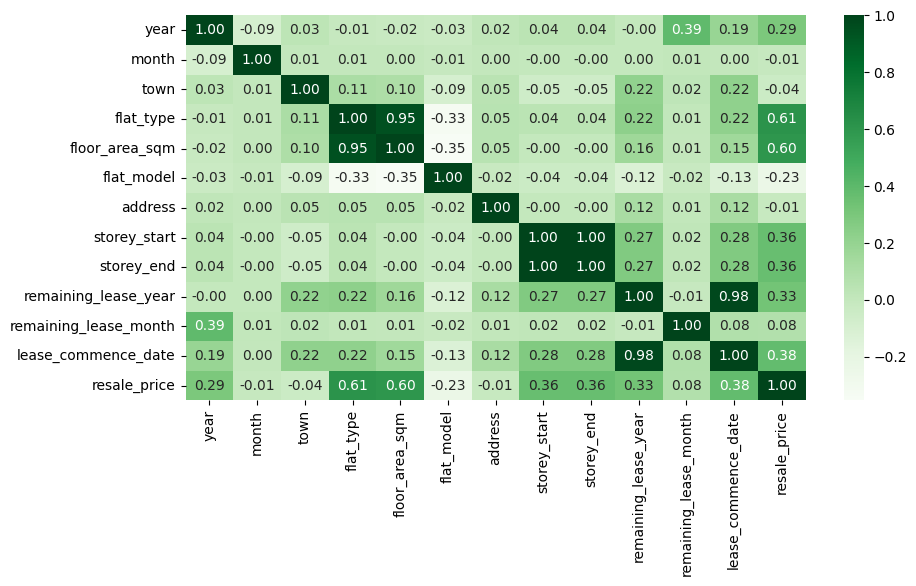

In [64]:
# checking the correlation using heatmap

df_8_corr = df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr, annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [4]:
df_final = pd.read_csv(r"C:/Users/rdine/Data_Science/data_science_practise/DataScience_projects/Singapore_flat_prediction/ResaleFlatPrices.csv")

In [5]:
df_final.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1597,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6557,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1429,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5399,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6712,7,9,64,0,1980,290000.0


In [6]:
# checking the duplicate values

df_final.duplicated().sum()

307

In [7]:
df_final_1 = df_final.drop_duplicates()
df_final_1.reset_index(drop=True, inplace=True)

In [8]:
df_final_1.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1597,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6557,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1429,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5399,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6712,7,9,64,0,1980,290000.0


In [9]:
# the month, address columns does have very lowest correlation with other features
# so I drop the month and address columns

In [10]:
df_final_2 = df_final_1.drop(columns=["month","address"])

In [11]:
df_final_2.head()

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2,60.0,5,7,9,70,0,1986,255000.0
1,2015,0,2,68.0,12,1,3,65,0,1981,275000.0
2,2015,0,2,69.0,12,1,3,64,0,1980,285000.0
3,2015,0,2,68.0,12,1,3,63,0,1979,290000.0
4,2015,0,2,68.0,12,7,9,64,0,1980,290000.0


In [12]:
# detecting the skewed columns using plot
def plot(df,column):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("distplot for "+" "+column)

    # histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df, x= column, kde= True, bins= 30, color="salmon")
    plt.title("histogram plot for"+" "+ column)

    #boxplot

    plt.subplot(1,3,3)
    sns.boxplot(df, x=column)
    plt.title("Box plot for "+" "+ column)

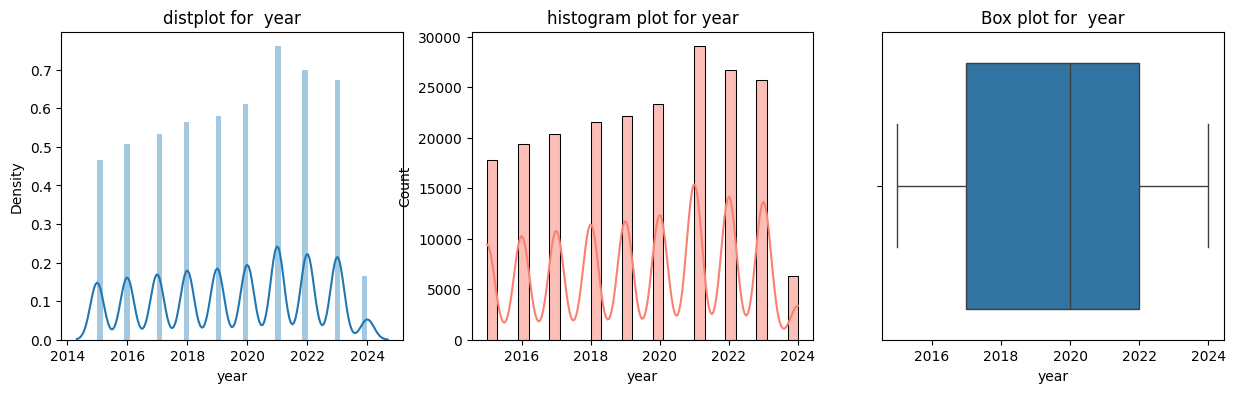

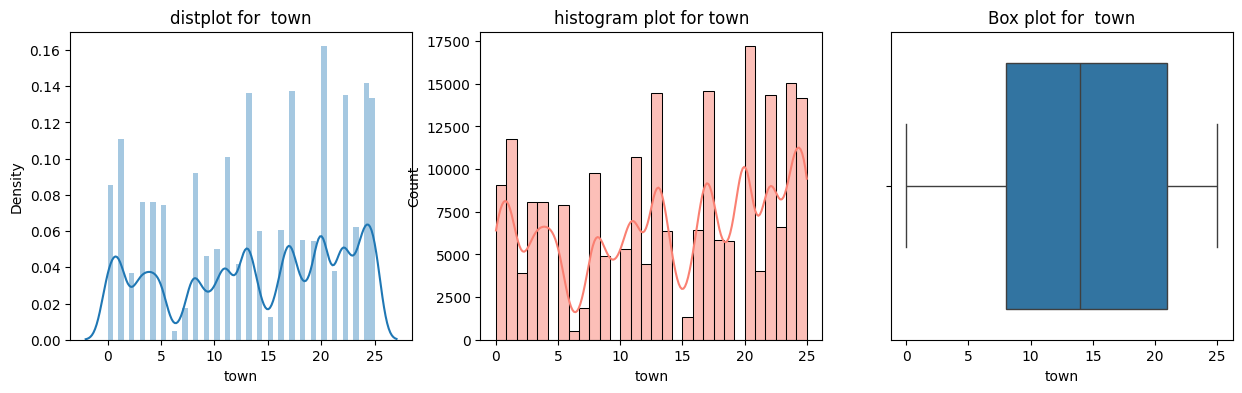

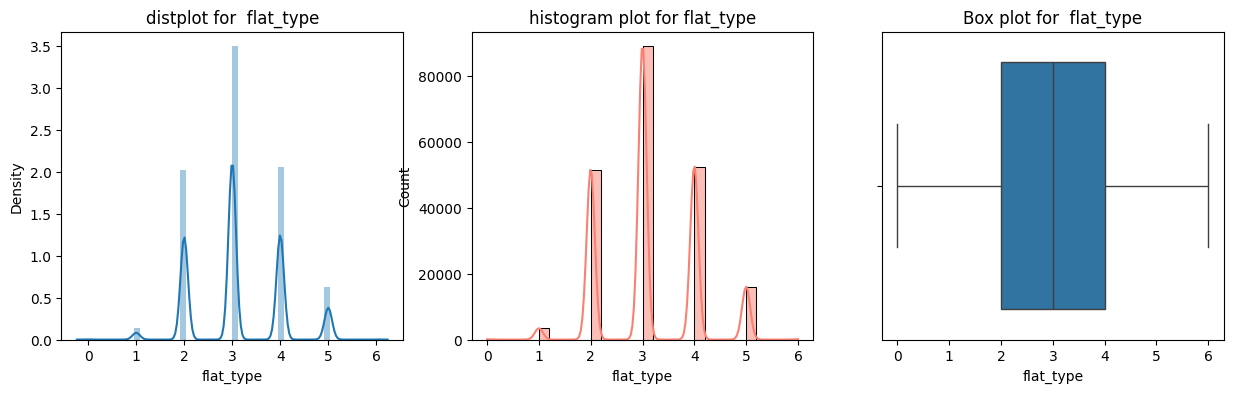

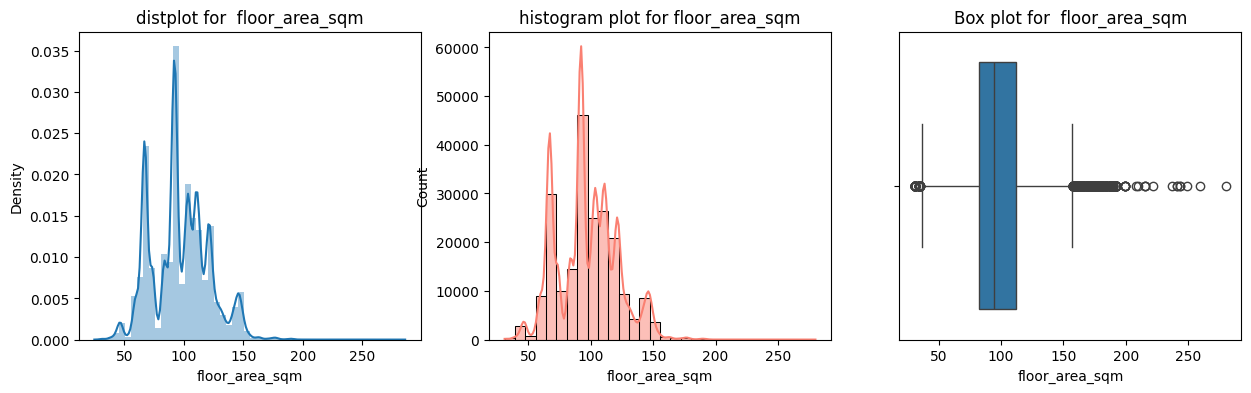

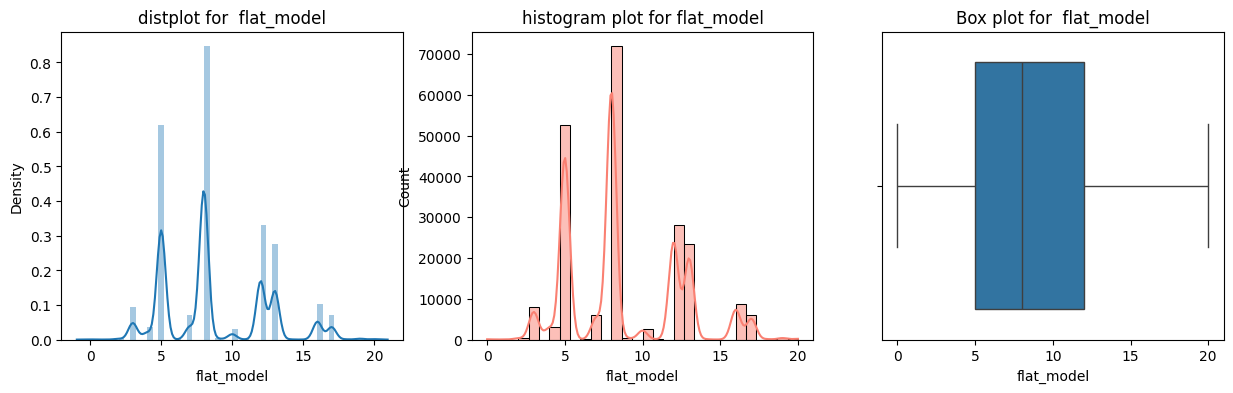

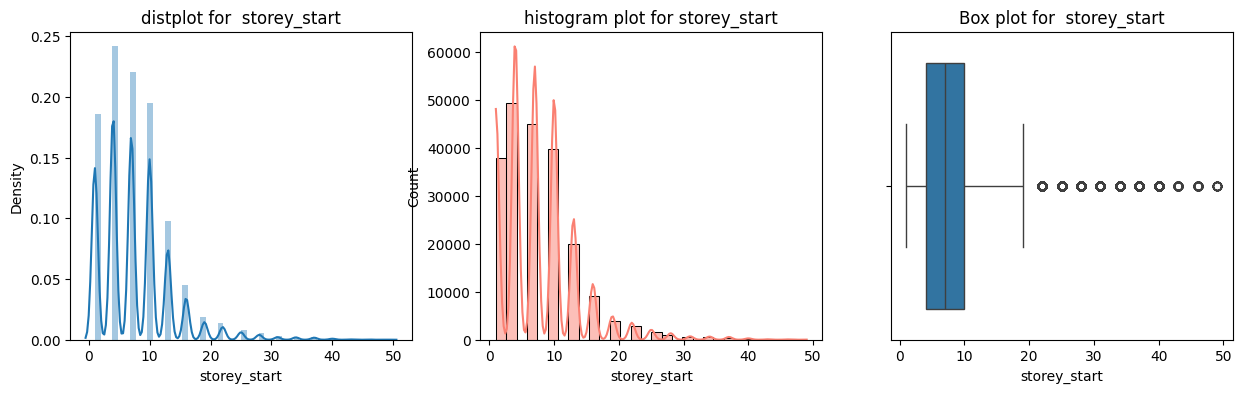

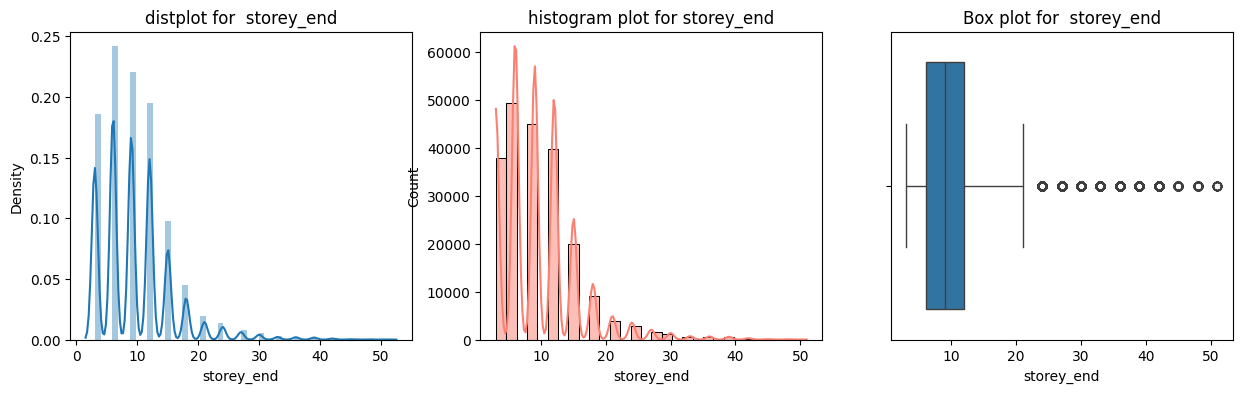

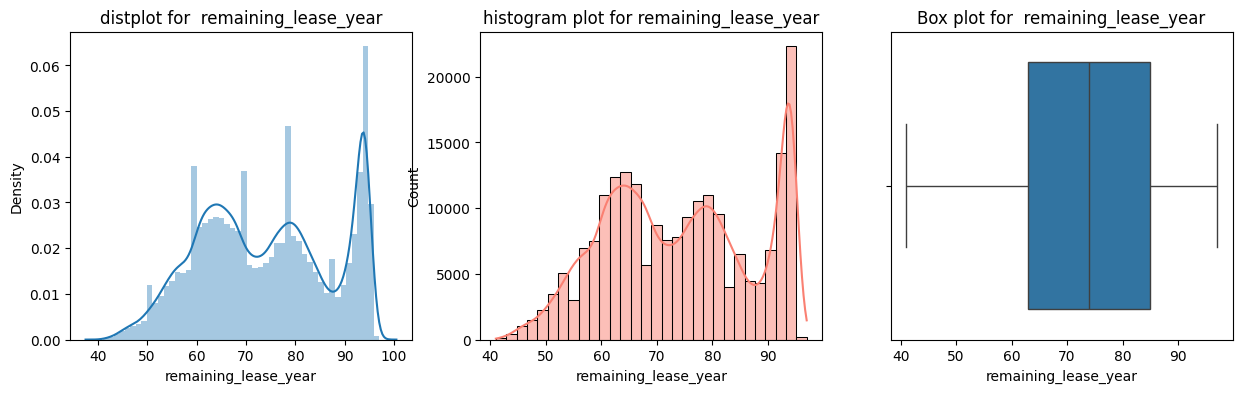

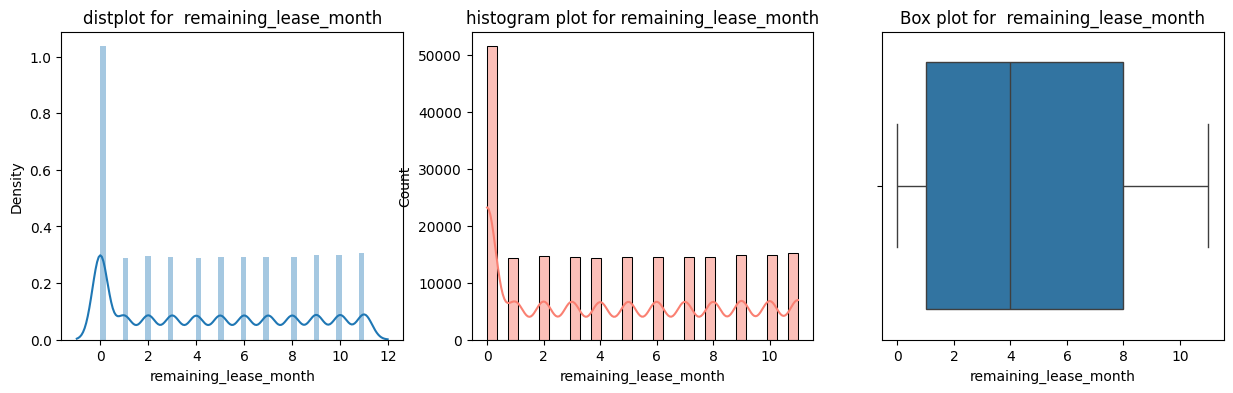

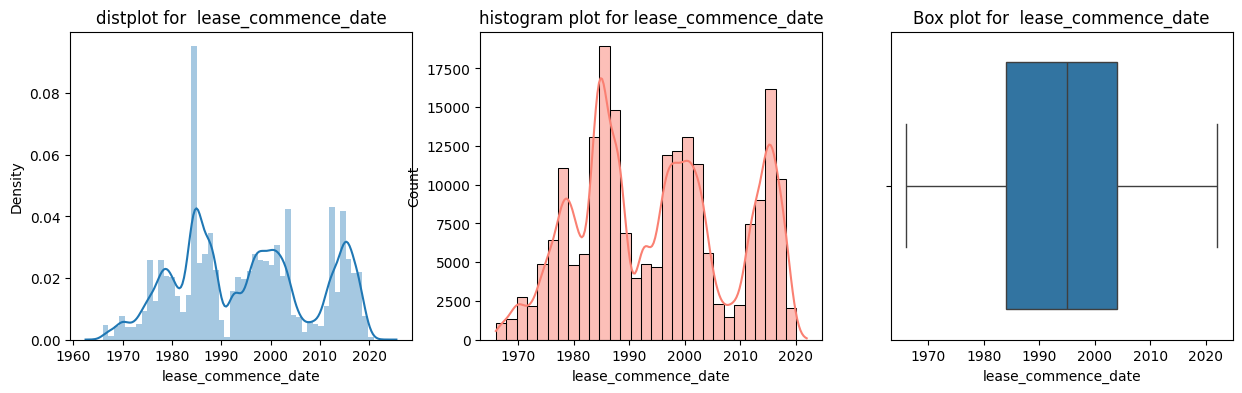

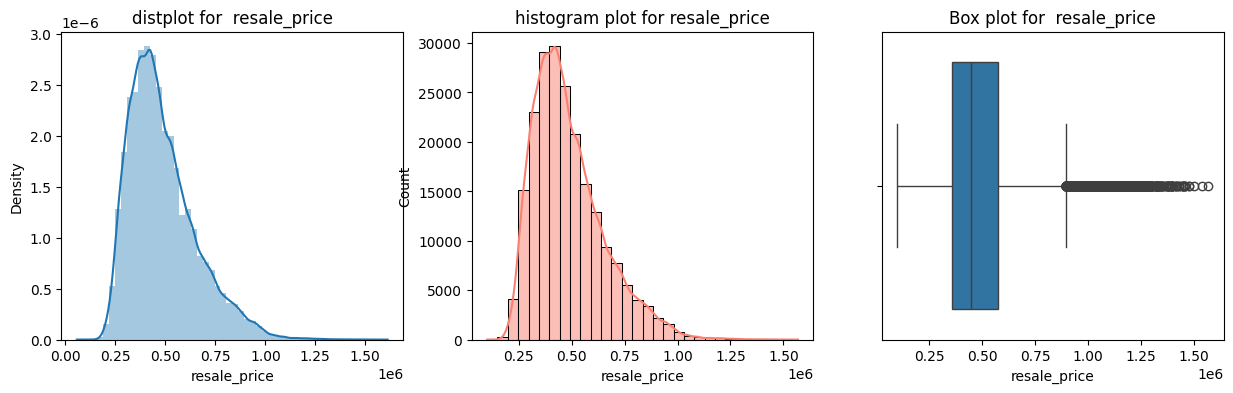

In [13]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [14]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,212321.0,2019.493206,2.621798,2015.0,2017.0,2020.0,2022.0,2024.0
town,212321.0,13.896261,7.955728,0.0,8.0,14.0,21.0,25.0
flat_type,212321.0,3.122781,0.919187,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,212321.0,97.186810,24.059330,31.0,82.0,94.0,112.0,280.0
flat_model,212321.0,8.695183,3.650716,0.0,5.0,8.0,12.0,20.0
storey_start,212321.0,7.659723,5.847168,1.0,4.0,7.0,10.0,49.0
storey_end,212321.0,9.659723,5.847168,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,212321.0,74.137485,13.426783,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,212321.0,4.576999,3.786098,0.0,1.0,4.0,8.0,11.0
lease_commence_date,212321.0,1995.070054,13.633654,1966.0,1984.0,1995.0,2004.0,2022.0


In [15]:
# skewness handling

df_final_3 = df_final_2.copy()

In [16]:
# The skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [17]:
df_final_3["storey_start"] = np.log(df_final_3["storey_start"])
df_final_3["storey_end"] = np.log(df_final_3["storey_end"])
df_final_3["resale_price"] = np.log(df_final_3["resale_price"])

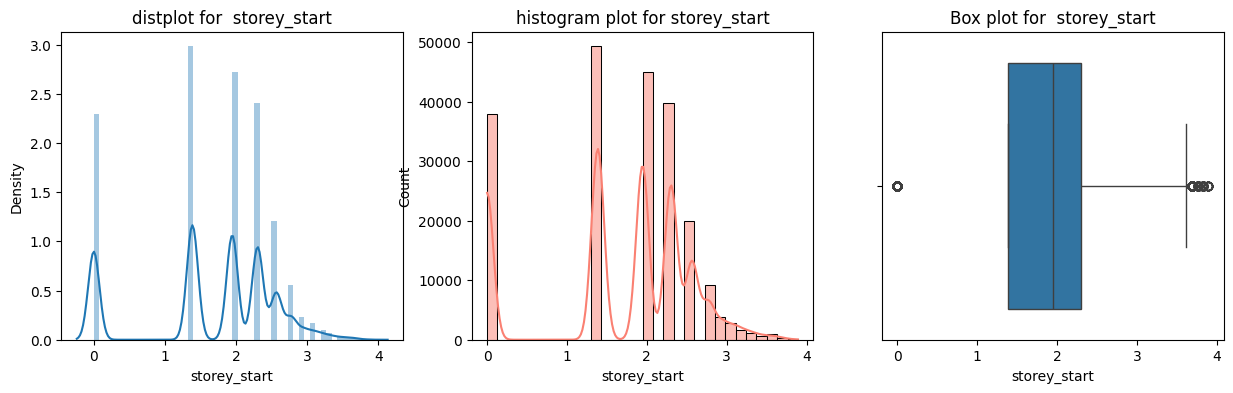

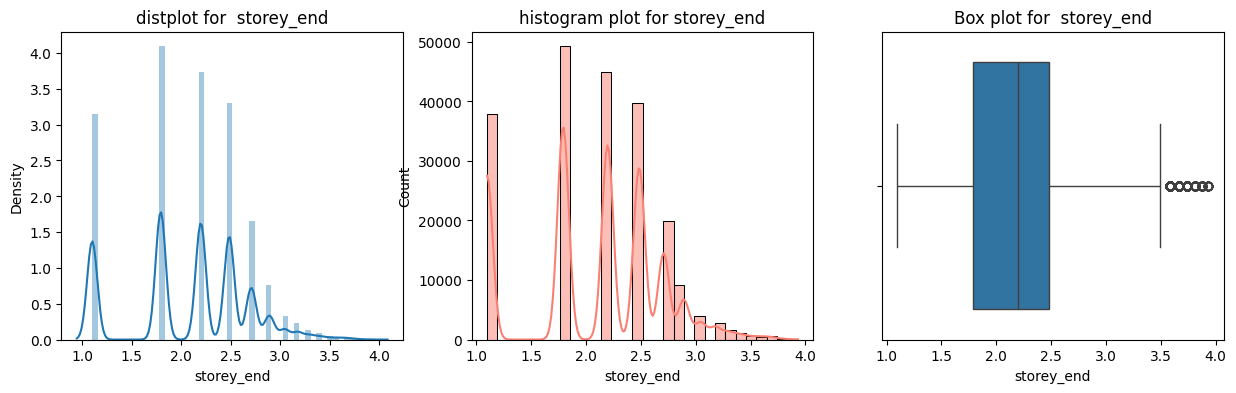

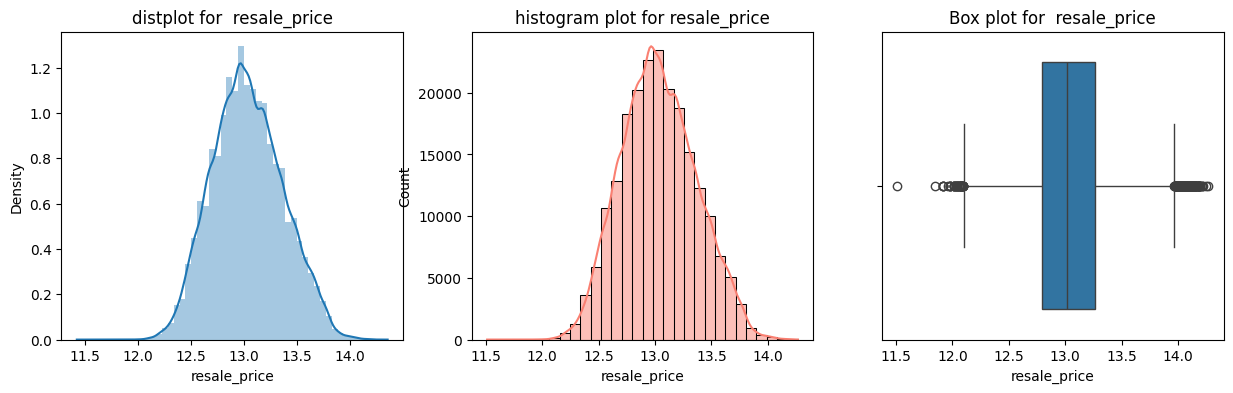

In [18]:
skewed_columns = ["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

In [19]:
# outliers handling - Interquartile Range (IQR) Method

df_final_4 = df_final_3.copy()


In [20]:
# The Outliers columns are
# 1. Floor_area_sqm
# 2. storey_start
# 3. storey_end
# 4. resale_price
# Recorrect the Outliers

In [21]:
# (Ex: lower threshold = 5  and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in feature
# below lower threshold values (<5) are converted to lower threshold value (5) in feature

In [22]:
def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1

    upper_threshold = q3 + (1.5*iqr)
    lower_threshold = q1 - (1.5*iqr)

    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [23]:
outlier_columns = ["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)


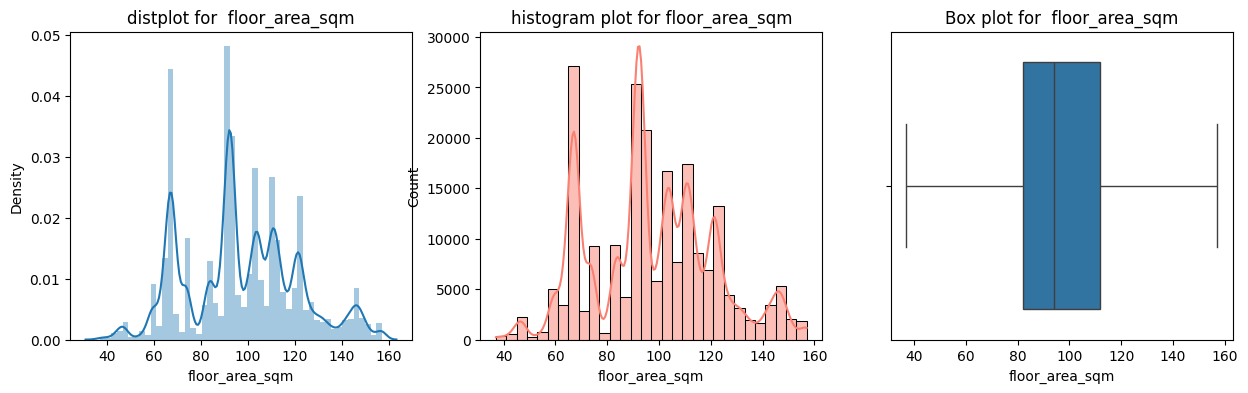

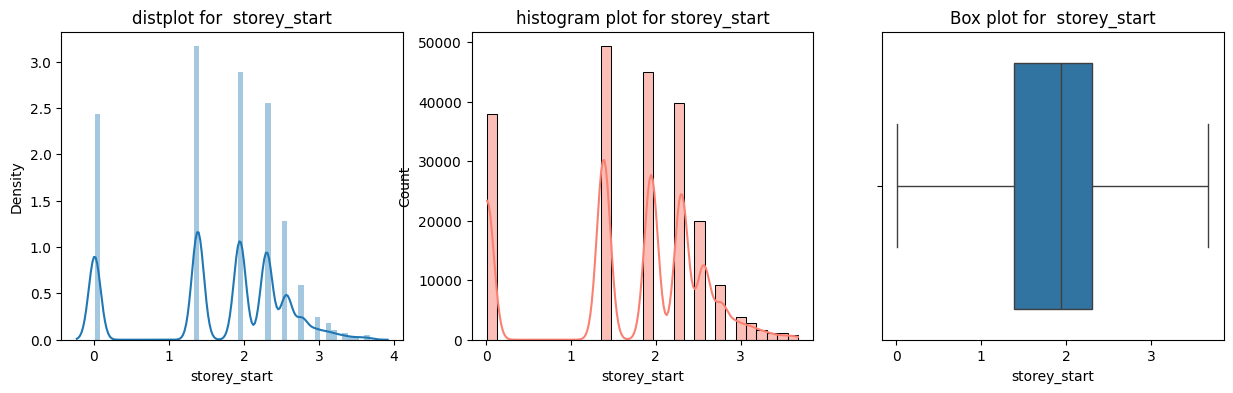

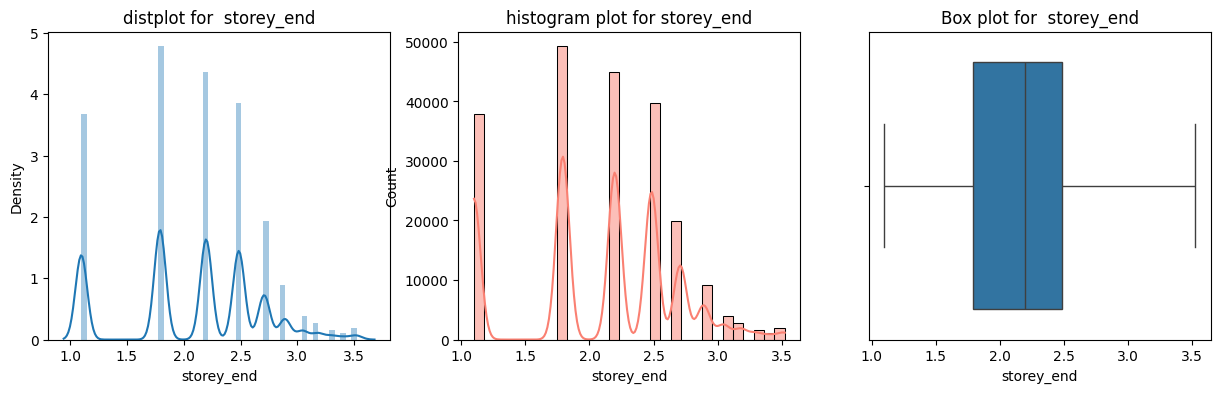

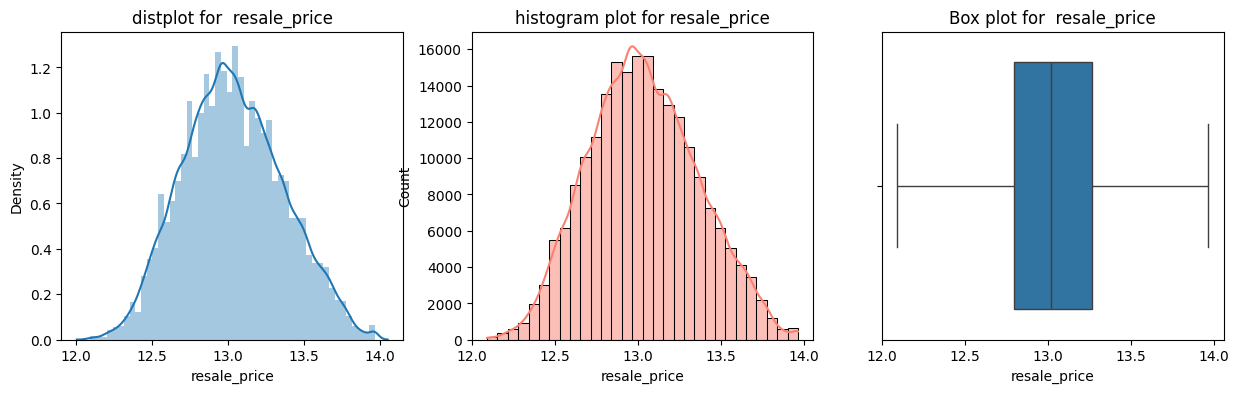

In [24]:
for k in outlier_columns:
    plot(df_final_4,k)

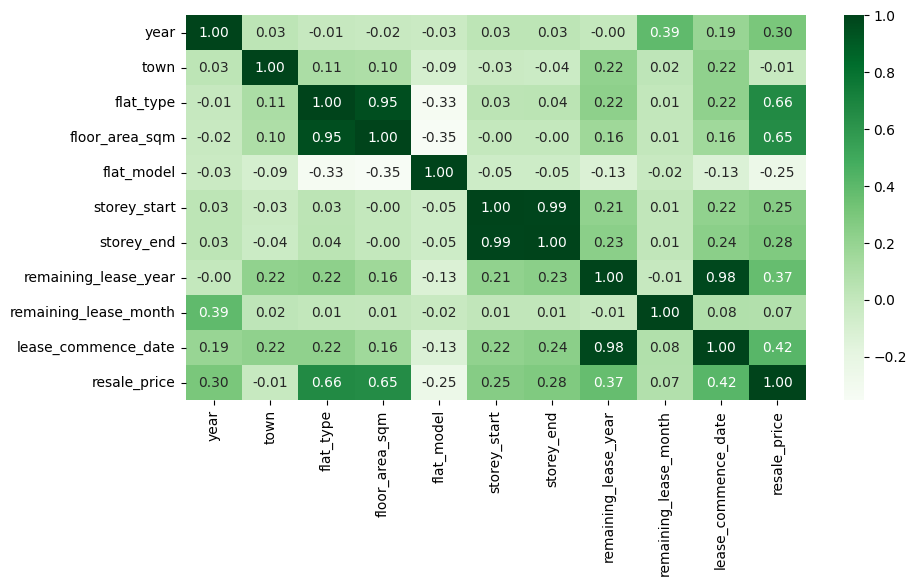

In [25]:
# checking the correlation after the outlier re-correlation
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show() 

In [26]:
# Model Selection (Regression)

In [27]:
df_final_5 = df_final_4.copy()

In [28]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,212321.0,2019.493206,2.621798,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,212321.0,13.896261,7.955728,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,212321.0,3.122781,0.919187,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,212321.0,97.106596,23.800863,37.000000,82.000000,94.000000,112.000000,157.000000
flat_model,212321.0,8.695183,3.650716,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,212321.0,1.695822,0.920767,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,212321.0,2.093503,0.601243,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,212321.0,74.137485,13.426783,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,212321.0,4.576999,3.786098,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,212321.0,1995.070054,13.633654,1966.000000,1984.000000,1995.000000,2004.000000,2022.000000


In [29]:
np.exp(13.942690)

1135620.7776035476

In [30]:
# checking how many data are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620 ]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36467,2016,12,14,2,259.0,18,6844,1,3,54,0,1972,1150000.0
38448,2017,2,2,4,120.0,4,3184,40,42,93,7,2011,1180000.0
47892,2017,7,18,5,156.0,3,1188,19,21,77,3,1995,1160000.0
54395,2017,11,7,4,107.0,20,1924,43,45,92,2,2011,1138000.0
60199,2018,3,7,4,107.0,20,1915,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211551,2024,3,14,3,92.0,8,2959,31,33,95,3,2020,1180000.0
211753,2024,3,18,4,124.0,5,3389,28,30,87,1,2012,1140000.0
211756,2024,3,18,4,117.0,5,7291,7,9,86,6,2011,1280000.0
211757,2024,3,18,5,154.0,7,1176,4,6,70,8,1995,1200000.0


In [31]:
np.exp(12.104561)

180694.13157722994

In [32]:
#checking how many data are  outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 180694 ]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2,60.0,5,1597,7,9,70,0,1986,255000.0
1,2015,1,0,2,68.0,12,6557,1,3,65,0,1981,275000.0
2,2015,1,0,2,69.0,12,1429,1,3,64,0,1980,285000.0
3,2015,1,0,2,68.0,12,5399,1,3,63,0,1979,290000.0
4,2015,1,0,2,68.0,12,6712,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212316,2024,3,25,5,146.0,3,8631,10,12,62,7,1987,851888.0
212317,2024,3,25,5,146.0,7,4655,7,9,63,4,1988,830000.0
212318,2024,3,25,5,146.0,7,4014,10,12,63,5,1988,820000.0
212319,2024,3,25,5,146.0,7,4485,4,6,63,5,1988,860000.0


In [33]:
# now we want  to create the model  for "resale_price" prediction
# importing the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [34]:
# Train test Split for model selection

def select_model(df,algorithm):
    # x,y spliting
    x = df.drop(columns=["resale_price"])
    y = df["resale_price"]

    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

    model = algorithm().fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    #checking the accuracy score

    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse =np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    metrics_train = {"Data": "Train Data",
                     "Name" : algorithm.__name__,
                     "r2_score" :train_r2,
                     "Mean_squared_error": train_mse,
                     "Root_mean_squared_error": train_rmse,
                     "mean_absolute_error": train_mse
                     }
    
    metrics_test ={"Data":"Test Data",
                   "Name": algorithm.__name__,
                   "r2_score" :test_r2,
                   "Mean_squared_error": test_mse,
                   "Root_mean_squared_error": test_rmse,
                   "mean_absolute_error": test_mse
                   }
    
    print(metrics_train)
    print(metrics_test)
    print("")

In [35]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'r2_score': 0.6716686415222369, 'Mean_squared_error': 0.03585671575263466, 'Root_mean_squared_error': 0.1893586960047905, 'mean_absolute_error': 0.03585671575263466}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'r2_score': 0.6683281157821732, 'Mean_squared_error': 0.036038196581800915, 'Root_mean_squared_error': 0.1898372897557298, 'mean_absolute_error': 0.036038196581800915}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'r2_score': 0.9961206409373122, 'Mean_squared_error': 0.00042366064532524134, 'Root_mean_squared_error': 0.0205830183725624, 'mean_absolute_error': 0.00042366064532524134}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'r2_score': 0.9253390519217917, 'Mean_squared_error': 0.00811237265459321, 'Root_mean_squared_error': 0.09006871074126246, 'mean_absolute_error': 0.00811237265459321}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'r2_score': 0.9910052693575419, 'Mean_squared_error': 0.0

In [37]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9543742909126842, 'Mean_squared_error': 0.004957514795534692, 'Root_mean_squared_error': 0.07040962146990062, 'Mean_absolute_error': 0.05175314738283048}


In [38]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [39]:
np.exp(12.815838)

367999.92008841544

In [40]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]


12.80780191838728

In [41]:
np.exp(12.792003979535888)

359332.7000997733

In [42]:
# saving the model using pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
    pickle.dump(model_1,f)

In [43]:
import pickle
import numpy as np

In [44]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model = pickle.load(f1)

In [45]:
user_data = np.array([[2015,8,5,4.955827, 3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.290685497542368

In [46]:
np.exp(12.31392335750493)

222776.28876245138